In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras import layers
from keras import models

In [3]:
model = models.Sequential()

In [4]:
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))

In [5]:
model.add(layers.MaxPooling2D(2,2))

In [6]:
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [7]:
model.add(layers.MaxPooling2D(2,2))

In [8]:
model.add(layers.Conv2D(128, (3,3), activation='relu'))

In [9]:
model.add(layers.MaxPooling2D(2,2))

In [10]:
model.add(layers.Conv2D(128, (3,3), activation='relu'))

In [11]:
model.add(layers.MaxPooling2D(2,2))

In [12]:
model.add(layers.Flatten())

In [13]:
model.add(layers.Dense(512, activation='relu'))

In [14]:
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [16]:
from keras import optimizers

In [17]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

In [18]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
## 데이터 증식하기 

In [20]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest'
                                  )

In [21]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [23]:
train_dir = './dataset/small/train'

In [24]:
train_generator = train_datagen.flow_from_directory( train_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.


In [25]:
for data_batch, label_batch in train_generator :
    print(data_batch.shape)
    print(label_batch.shape)
    break

(20, 150, 150, 3)
(20,)


In [26]:
validation_dir = './dataset/small/validation'

In [27]:
validation_generator = validation_datagen.flow_from_directory( validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 1000 images belonging to 2 classes.


In [28]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data = validation_generator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 41s 407ms/step - loss: 0.6941 - accuracy: 0.5155 - val_loss: 0.6861 - val_accuracy: 0.6030
Epoch 2/30
100/100 [==============================] - 41s 409ms/step - loss: 0.6791 - accuracy: 0.5685 - val_loss: 0.6826 - val_accuracy: 0.6340
Epoch 3/30
100/100 [==============================] - 44s 438ms/step - loss: 0.6527 - accuracy: 0.6125 - val_loss: 0.6507 - val_accuracy: 0.6310
Epoch 4/30
100/100 [==============================] - 41s 412ms/step - loss: 0.6161 - accuracy: 0.6605 - val_loss: 0.5723 - val_accuracy: 0.6450
Epoch 5/30
100/100 [==============================] - 42s 418ms/step - loss: 0.5979 - accuracy: 0.6770 - val_loss: 0.5876 - val_accuracy: 0.6670
Epoch 6/30
100/100 [==============================] - 41s 408ms/step - loss: 0.5746 - accuracy: 0.6900 - val_loss: 0.6875 - val_accuracy: 0.6820
Epoch 7/30
100/100 [==============================] - 44s 441ms/step - loss: 0.5684 - accuracy: 0.7010 - val_loss: 0.5239 - val_ac

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
epochs = range(1, len(history.history['accuracy'])+1)

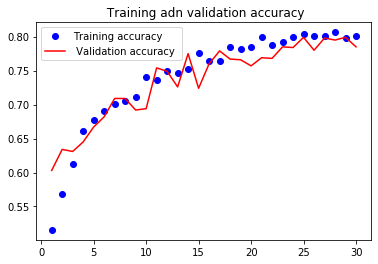

In [31]:
plt.plot(epochs, history.history['accuracy'], 'bo', label='Training accuracy ')
plt.plot(epochs, history.history['val_accuracy'], 'r', label=' Validation accuracy ')
plt.title(" Training adn validation accuracy")
plt.legend()

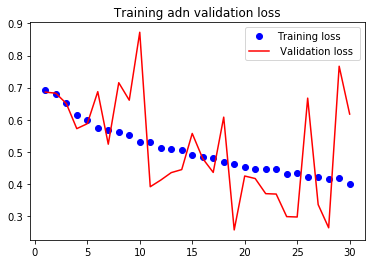

In [32]:
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss ')
plt.plot(epochs, history.history['val_loss'], 'r', label=' Validation loss ')
plt.title(" Training adn validation loss ")
plt.legend()

In [33]:
test_dir = './dataset/small/test'

In [34]:
test_generator = test_datagen.flow_from_directory( test_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 1000 images belonging to 2 classes.


In [35]:
model.evaluate_generator(test_generator)

[0.5800288915634155, 0.7649999856948853]